# Problem Statement: Titanic
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [18]:
# reading the data
titanic_train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
# getting the shape
titanic_train.shape

(891, 12)

In [19]:
# looking at the head of the data
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# Checking unique values of any column
titanic_train['Survived'].unique()

array([0, 1], dtype=int64)

In [21]:
# How to rename categories using pandas method
new_survived = pd.Categorical(titanic_train["Survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])
new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


In [22]:
titanic_train["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [23]:
new_Pclass = pd.Categorical(titanic_train["Pclass"],ordered=True)
new_Pclass = new_Pclass.rename_categories(['Class1','Class2','Class3'])
new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [24]:
# Reassign New name to Pclass
titanic_train['Pclass'] = new_Pclass

In [25]:
# Check if they have changed
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,Class3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
# Find all the passangers who's age is missing
missing = np.where(titanic_train['Age'].isnull()== True)
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

In [27]:
# Using the index, locate passangers
titanic_train.loc[missing]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,Class3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,Class2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,Class3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,Class3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,Class3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,Class3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,Class3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,Class3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,Class3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [28]:
# Find max. fare
index = np.where(titanic_train['Fare'] == max(titanic_train['Fare']))
index

(array([258, 679, 737], dtype=int64),)

In [29]:
titanic_train.loc[index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,Class1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,Class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,Class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [30]:
# SibSp and parch are siblings and parents/guardian resp.(add both of them and create new column)
titanic_train['Family'] = titanic_train['SibSp'] + titanic_train['Parch']
most_family = np.where(titanic_train['Family'] == max(titanic_train['Family']))
titanic_train.loc[most_family]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
159,160,0,Class3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
180,181,0,Class3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,10
201,202,0,Class3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
324,325,0,Class3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
792,793,0,Class3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,10
846,847,0,Class3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
863,864,0,Class3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,10


<AxesSubplot:xlabel='Survived', ylabel='count'>

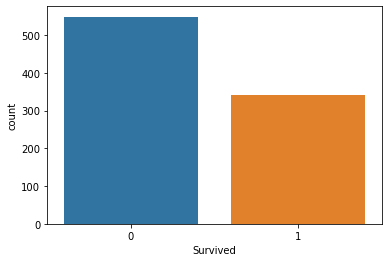

In [35]:
# Analysing data & Visualization
sns.countplot(x='Survived', data=titanic_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

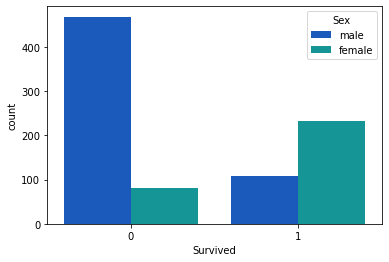

In [36]:
# Those who did not survived (more than 500) are greater than those who survived(nearly 300)
sns.countplot(x='Survived', hue='Sex', data=titanic_train, palette='winter')

<AxesSubplot:xlabel='Survived', ylabel='count'>

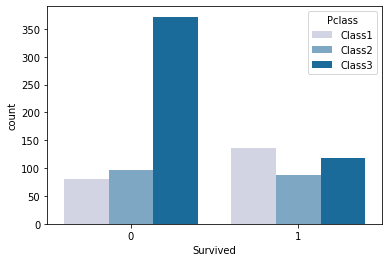

In [37]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_train, palette='PuBu')

<AxesSubplot:ylabel='Frequency'>

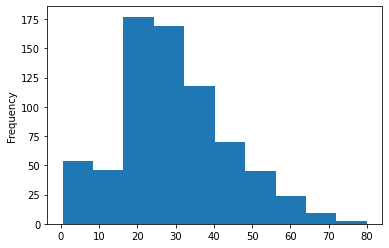

In [38]:
titanic_train['Age'].plot.hist()

In [40]:
# We notititanic_traince that highest age grp travelling are among the young age between 20-40.
# Very few passangers in age grp 70-80

<AxesSubplot:ylabel='Frequency'>

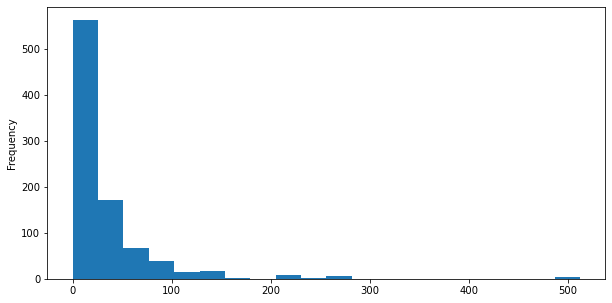

In [41]:
titanic_train['Fare'].plot.hist(bins=20, figsize=(10,5))
# we observe that most of the tickets bought are under fare 100
# very few are on the higher side of fare i.e 200-500 range

<AxesSubplot:xlabel='SibSp', ylabel='count'>

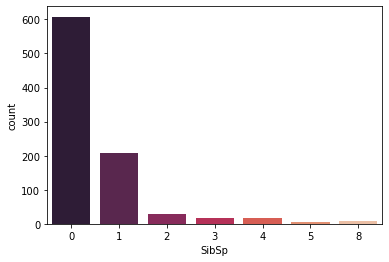

In [42]:
sns.countplot(x='SibSp', data=titanic_train, palette='rocket')
# We notice that most of the passengers don't have their siblings aboard

<AxesSubplot:ylabel='Frequency'>

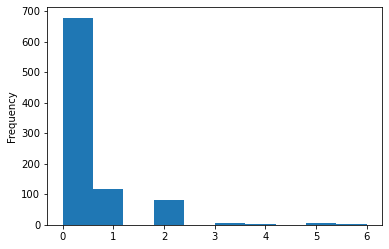

In [43]:
titanic_train['Parch'].plot.hist()

<AxesSubplot:xlabel='Parch', ylabel='count'>

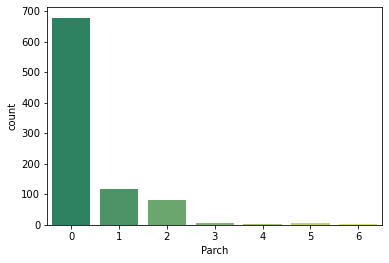

In [45]:
sns.countplot(x='Parch', data =titanic_train, palette = 'summer')
# the no of parents and siblings who aboard the ship are less

In [ ]:
# Data wrangling- cleaning the data , removing the null values, dropping unwanted columns, adding new instead if needed.

In [46]:
titanic_train.isnull().sum()
#  Age an cabin has most of the null values, emnarked too has null values
# we can plot it on heat map

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
dtype: int64

<AxesSubplot:>

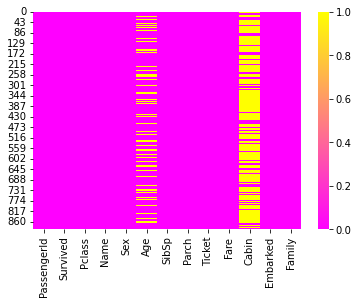

In [47]:
sns.heatmap(titanic_train.isnull(), cmap='spring')
# Here yellow color is showing the null values, highest in cabin followed by age

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

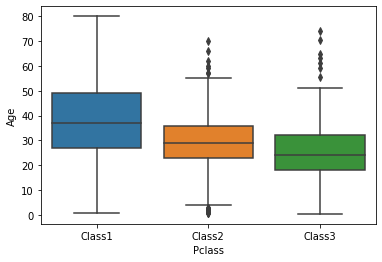

In [48]:
sns.boxplot(x='Pclass', y='Age', data=titanic_train)
# We can observe that older agegrp are travelling more in class 1 and 2 compared to class 3.

In [84]:
# Training the Model
X= titanic_train.drop('Survived', axis=1)
y= titanic_train['Survived']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=4)

In [87]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

In [88]:
prediction= lm.predict(X_test)
from sklearn.metrics import classification_report
classification_report(y_text, prediction)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

NameError: name 'prediction' is not defined

In [90]:
from sklearn.metrics
import accuracy_score
accuracy_score(y-test,prediction)

SyntaxError: invalid syntax (1965513299.py, line 1)